## Instalações

Primeiro, é necessário instalar e importar as bibliotecas essenciais para manipulação e análise de dados, bem como para a construção e treinamento do modelo de deep learning. Utilizamos gdown para baixar arquivos diretamente do Google Drive, e em seguida, várias bibliotecas como pandas e numpy para manipulação de dados, matplotlib e seaborn para visualização, plotly para visualizações interativas, e scikit-learn para pré-processamento e modelagem. Além disso, tensorflow.keras é usado para a construção do modelo de deep learning.

In [145]:
pip install gdown

In [ ]:
# !gdown 1GvuraZWhfcXAsX-uTO7BG8BUlrxTuxRg

Downloading...
From (original): https://drive.google.com/uc?id=1GvuraZWhfcXAsX-uTO7BG8BUlrxTuxRg
From (redirected): https://drive.google.com/uc?id=1GvuraZWhfcXAsX-uTO7BG8BUlrxTuxRg&confirm=t&uuid=a752ee44-a6cd-4ebd-8750-1e63940999ee
To: /content/creditcard.csv.zip
100% 69.2M/69.2M [00:00<00:00, 116MB/s]


In [146]:
!gdown 1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze

Downloading...
From (original): https://drive.google.com/uc?id=1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze
From (redirected): https://drive.google.com/uc?id=1P9G7GFd8127t7coeX9fQ6vLR2G5d3Wze&confirm=t&uuid=cba3d511-55d7-41f4-8099-b98d13d42655
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 129MB/s]


In [147]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Lion
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import keras

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Escolha um dataset pronto adequado para classificação binária, evitando datasets "toy" como `Iris` ou `Pima Indians Diabetes`. Certifique-se de selecionar um dataset que ofereça desafios reais em termos de volume e complexidade.


Em seguida, explore o dataset escolhido e explique suas características principais, como o número de amostras, features, e a tarefa de classificação que ele representa.


Desenvolva um modelo sequencial em Keras com uma única camada Dense, utilizando uma unidade com a função de ativação sigmoid. Compile o modelo utilizando o otimizador adam, a função de perda binary_crossentropy, e a métrica accuracy. Inclua também a métrica F1 para uma avaliação mais completa, e explique brevemente a função de cada um desses componentes no treinamento.


Treine o modelo por 50 épocas com um batch size de 10. Após o treinamento, utilize o modelo para prever os rótulos do conjunto de teste e calcule tanto a acurácia quanto a métrica F1. Interprete os resultados, discutindo o desempenho do modelo e possíveis melhorias.


Entregue o link do caderno `.ipynb` em um repositório GitHub.

In [167]:
df = pd.read_csv('/content/creditcard.csv', delimiter=',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Análise exploratória

O dataset escolhido contém dados de transações realizadas com cartões de crédito, sendo amplamente utilizado para estudos de detecção de fraudes.

Ele foi criado com o objetivo de treinar e avaliar modelos de aprendizado de máquina na identificação de transações fraudulentas em meio a uma grande quantidade de transações legítimas.

Neste estágio, o dataset de transações de cartões de crédito é carregado, e uma análise exploratória é realizada para entender suas principais características, como a quantidade de amostras, as features disponíveis, e a tarefa de classificação que ele representa. Esta análise inclui a verificação das dimensões do dataset, os tipos de dados, a identificação de valores ausentes e a geração de estatísticas descritivas.

Além disso, são geradas visualizações que comparam a distribuição dos montantes das transações entre fraudes e não fraudes, além de uma análise temporal da variável Time. Também é gerada uma matriz de correlação para verificar a relação entre as variáveis.



In [ ]:
# df = pd.read_csv('/content/creditcard.csv.zip', delimiter=',')
# df

In [149]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [150]:
# Dimensões do dataset
dataset_shape = df.shape
dataset_shape

(284807, 31)

In [151]:
# Tipos de dados
data_types = df.dtypes
data_types.head()

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64


In [152]:
missing_values = df.isnull().sum()
missing_values.head()

,0
Time,0
V1,0
V2,0
V3,0
V4,0


In [153]:
summary_statistics = df.describe()
summary_statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


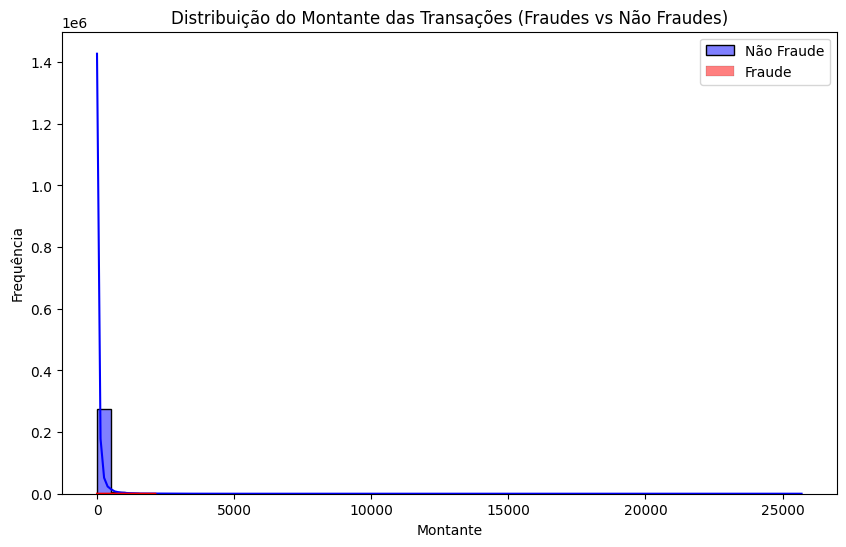

In [154]:
# Comparação entre a distribuição do montante das transações para fraudes e não fraudes
plt.figure(figsize=(10,6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Não Fraude', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraude', kde=True)
plt.title('Distribuição do Montante das Transações (Fraudes vs Não Fraudes)')
plt.xlabel('Montante')
plt.ylabel('Frequência')
plt.legend()
plt.show()

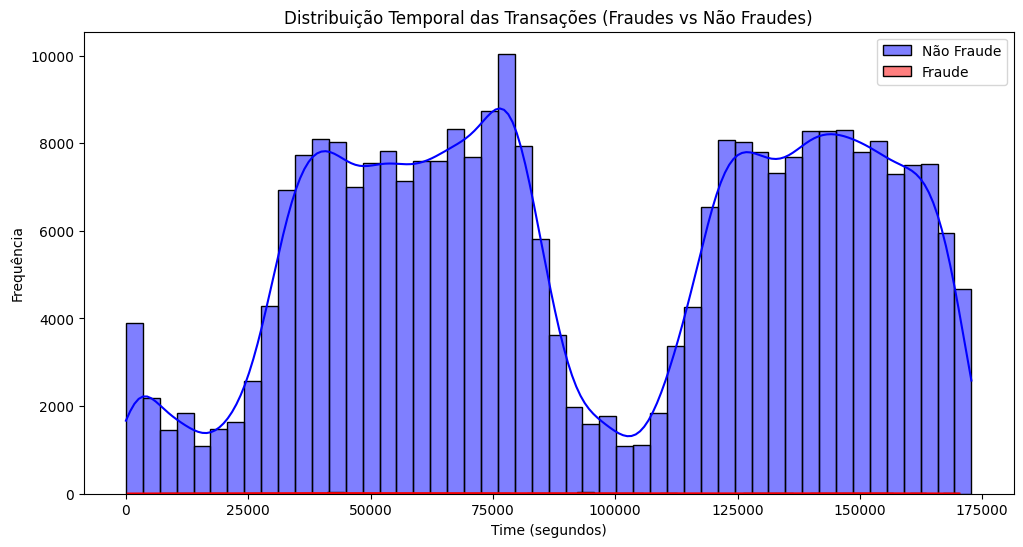

In [155]:
# Análise temporal da variável Time
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='blue', label='Não Fraude', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', label='Fraude', kde=True)
plt.title('Distribuição Temporal das Transações (Fraudes vs Não Fraudes)')
plt.xlabel('Time (segundos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

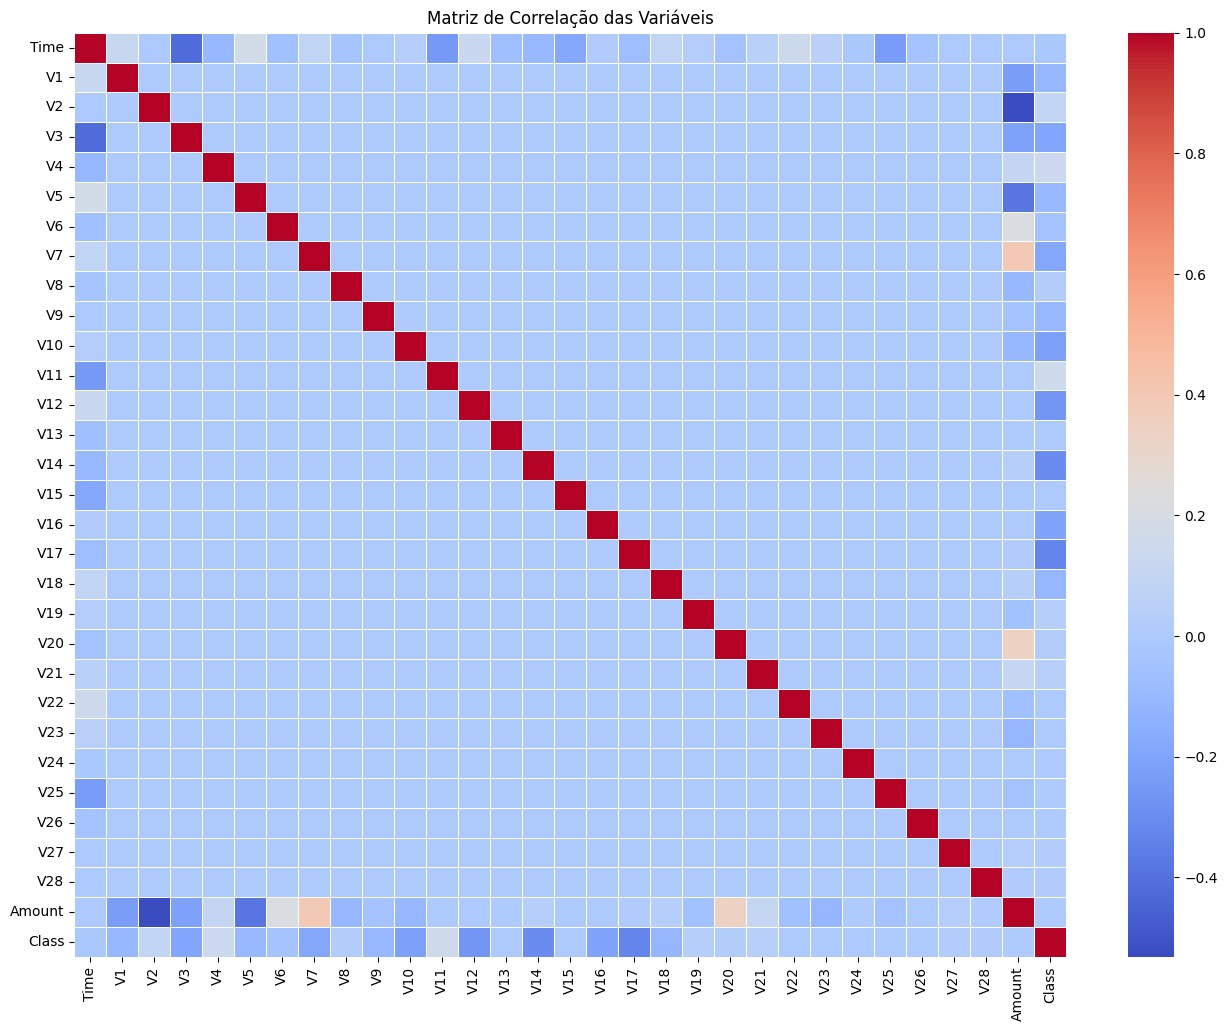

In [156]:
# Matriz de correlação
correlation_matrix = df.corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()


## Limpeza de dados e balanceamento

Nesta etapa, as colunas Amount e Time são normalizadas usando o RobustScaler para minimizar o impacto de outliers. Em seguida, o SMOTE é aplicado para balancear as classes, aumentando artificialmente o número de amostras na classe minoritária (fraudes). Após a aplicação do SMOTE, um novo dataframe balanceado é criado, e a distribuição das classes é verificada.

Distribuição das classes após SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


<ipython-input-168-d3ed754de04e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


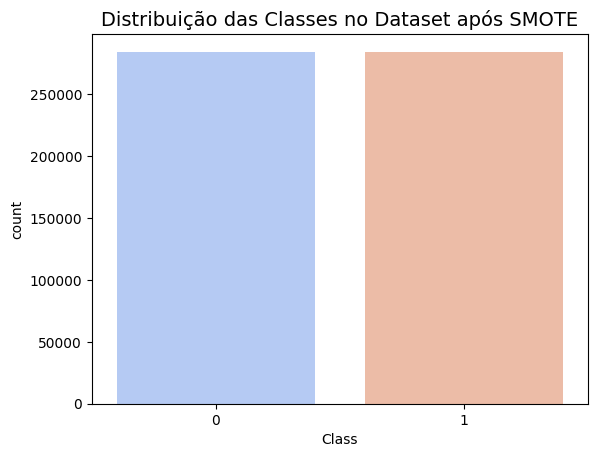

In [168]:
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Normalização das colunas `Amount` e `Time` usando RobustScaler**
rob_scaler = RobustScaler()

# Criando novas colunas normalizadas para 'Amount' e 'Time'
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Removendo as colunas originais 'Amount' e 'Time'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorganizando as colunas para colocar 'scaled_amount' e 'scaled_time' no início do DataFrame
df.insert(0, 'scaled_amount', df.pop('scaled_amount'))
df.insert(1, 'scaled_time', df.pop('scaled_time'))

# **2. Separação entre Features e Rótulo**
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Rótulo

# **3. Aplicação de SMOTE para balancear o dataset**
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# **4. Criando um novo DataFrame balanceado**
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Class'] = y_resampled

# **5. Verificação da nova distribuição das classes**
print("Distribuição das classes após SMOTE:")
print(df['Class'].value_counts())

# Visualização da nova distribuição das classes
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Distribuição das Classes no Dataset após SMOTE', fontsize=14)
plt.show()


In [169]:
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


## Criação do modelo

Com os dados balanceados, o próximo passo é criar o modelo de deep learning usando tensorflow.keras. O dataset é dividido em conjuntos de treino e teste, e as features são normalizadas. O modelo é então definido como uma rede neural sequencial com várias camadas densas, usando relu como função de ativação e sigmoid na camada de saída para classificação binária. O modelo é compilado utilizando o otimizador Lion, com a função de perda binary_crossentropy, e as métricas accuracy e AUC para avaliação.

In [170]:
from sklearn.model_selection import train_test_split
# Separando as features e o rótulo
X = df.drop(columns=['Class'])
y = df['Class']

# Garantir que o split mantém a distribuição de classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
# Definindo o modelo
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer=Lion(learning_rate=1),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,665 (18.22 KB)

 Trainable params: 4,665 (18.22 KB)

 Non-trainable params: 0 (0.00 B)

## Treinamento e avaliação do modelo

O modelo é treinado com o uso de EarlyStopping para prevenir overfitting. Após o treinamento, as previsões são realizadas no conjunto de teste, e o desempenho do modelo é avaliado utilizando as métricas de acurácia e F1 Score.



In [176]:
from tensorflow.keras.callbacks import EarlyStopping

# Treinando o modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=10,
                    validation_split=0.3,
                    callbacks=[early_stopping])


Epoch 1/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 103s 4ms/step - accuracy: 0.4985 - auc: 0.4987 - loss: 0.7004 - val_accuracy: 0.5018 - val_auc: 0.5000 - val_loss: 0.6978
Epoch 2/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 110s 3ms/step - accuracy: 0.4997 - auc: 0.4999 - loss: 0.7005 - val_accuracy: 0.5018 - val_auc: 0.5000 - val_loss: 0.6942
Epoch 3/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.5005 - auc: 0.4999 - loss: 0.7006 - val_accuracy: 0.5018 - val_auc: 0.5000 - val_loss: 0.7123
Epoch 4/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.5005 - auc: 0.4997 - loss: 0.7004 - val_accuracy: 0.5018 - val_auc: 0.5000 - val_loss: 0.6942
Epoch 5/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - accuracy: 0.5014 - auc: 0.5009 - loss: 0.7008 - val_accuracy: 0.4982 - val_auc: 0.5000 - val_loss: 0.6930
Epoch 6/30
27863/27863 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.5025 - auc: 0.5041 - loss: 0.7002 - val_accuracy: 0.4982 - val_auc: 0.5000 - val_loss: 0.7049
Epoch 7/

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Previsão no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


4416/5331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step